In [1]:
import numpy as np
from matplotlib import pyplot as plt

from src.worker import Worker

In [2]:
ID = "C75694" # ID вашего вещества

In [4]:
worker = Worker(ID)

# Линия насыщения

In [5]:
# Нижние, верхние границы температур и шаг для линии насыщения
# Данные указываются в градусах Цельсия (°C)
TLow_saturation = -110
THigh_saturation = 190
TInc_saturation = 1 # Шаг изменения температуры

In [6]:
T_saturation, S_saturation, H_saturation = worker.saturation(TLow_saturation, THigh_saturation, TInc_saturation)

Получение данных о линии насыщения...
Данные получены успешно
Сохранение данных линии насыщения...
Данные успешно сохранены


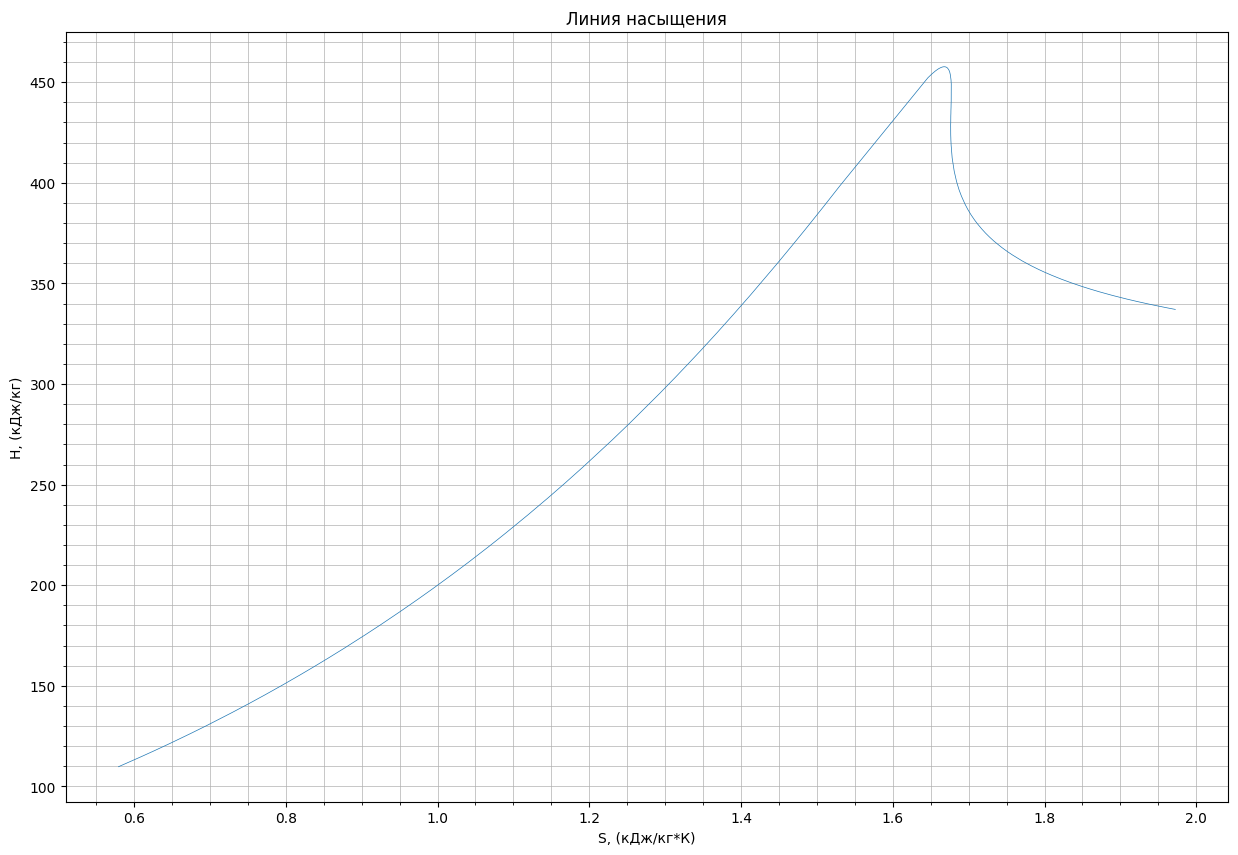

In [7]:
plt.subplots(figsize=(15, 10))
plt.plot(S_saturation, H_saturation, linewidth=0.5)
plt.ylabel("H, (кДж/кг)")
plt.xlabel("S, (кДж/кг*К)")
plt.title("Линия насыщения")
plt.grid(True, which='both', linewidth=0.5)
plt.minorticks_on() 
plt.show()

# Изотермы

In [8]:
# Данные указываются в градусах Цельсия (°C)
T_isothermal_array = [-10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350]
print("Температуры для построения изотерм:\n")
print(T_isothermal_array)


PLow_isothermal = 0.1 # Нижние и верхние границы давлений для изотерм
PHigh_isothermal = 100
PInc_isothermal = 1 # Шаг давлений для изотерм

Температуры для построения изотерм:

[-10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350]


In [9]:
T_isothermal, H_isothermal, S_isothermal = worker.isothermal(
    T_isothermal_array, 
    PLow_isothermal, 
    PHigh_isothermal, 
    PInc_isothermal
)

Получение данных о изотерме -10°C...
Данные получены успешно
Получение данных о изотерме 0°C...
Данные получены успешно
Получение данных о изотерме 10°C...
Данные получены успешно
Получение данных о изотерме 20°C...
Данные получены успешно
Получение данных о изотерме 30°C...
Данные получены успешно
Получение данных о изотерме 40°C...
Данные получены успешно
Получение данных о изотерме 50°C...
Данные получены успешно
Получение данных о изотерме 60°C...
Данные получены успешно
Получение данных о изотерме 70°C...
Данные получены успешно
Получение данных о изотерме 80°C...
Данные получены успешно
Получение данных о изотерме 90°C...
Данные получены успешно
Получение данных о изотерме 100°C...
Данные получены успешно
Получение данных о изотерме 110°C...
Данные получены успешно
Получение данных о изотерме 120°C...
Данные получены успешно
Получение данных о изотерме 130°C...
Данные получены успешно
Получение данных о изотерме 140°C...
Данные получены успешно
Получение данных о изотерме 150°C..

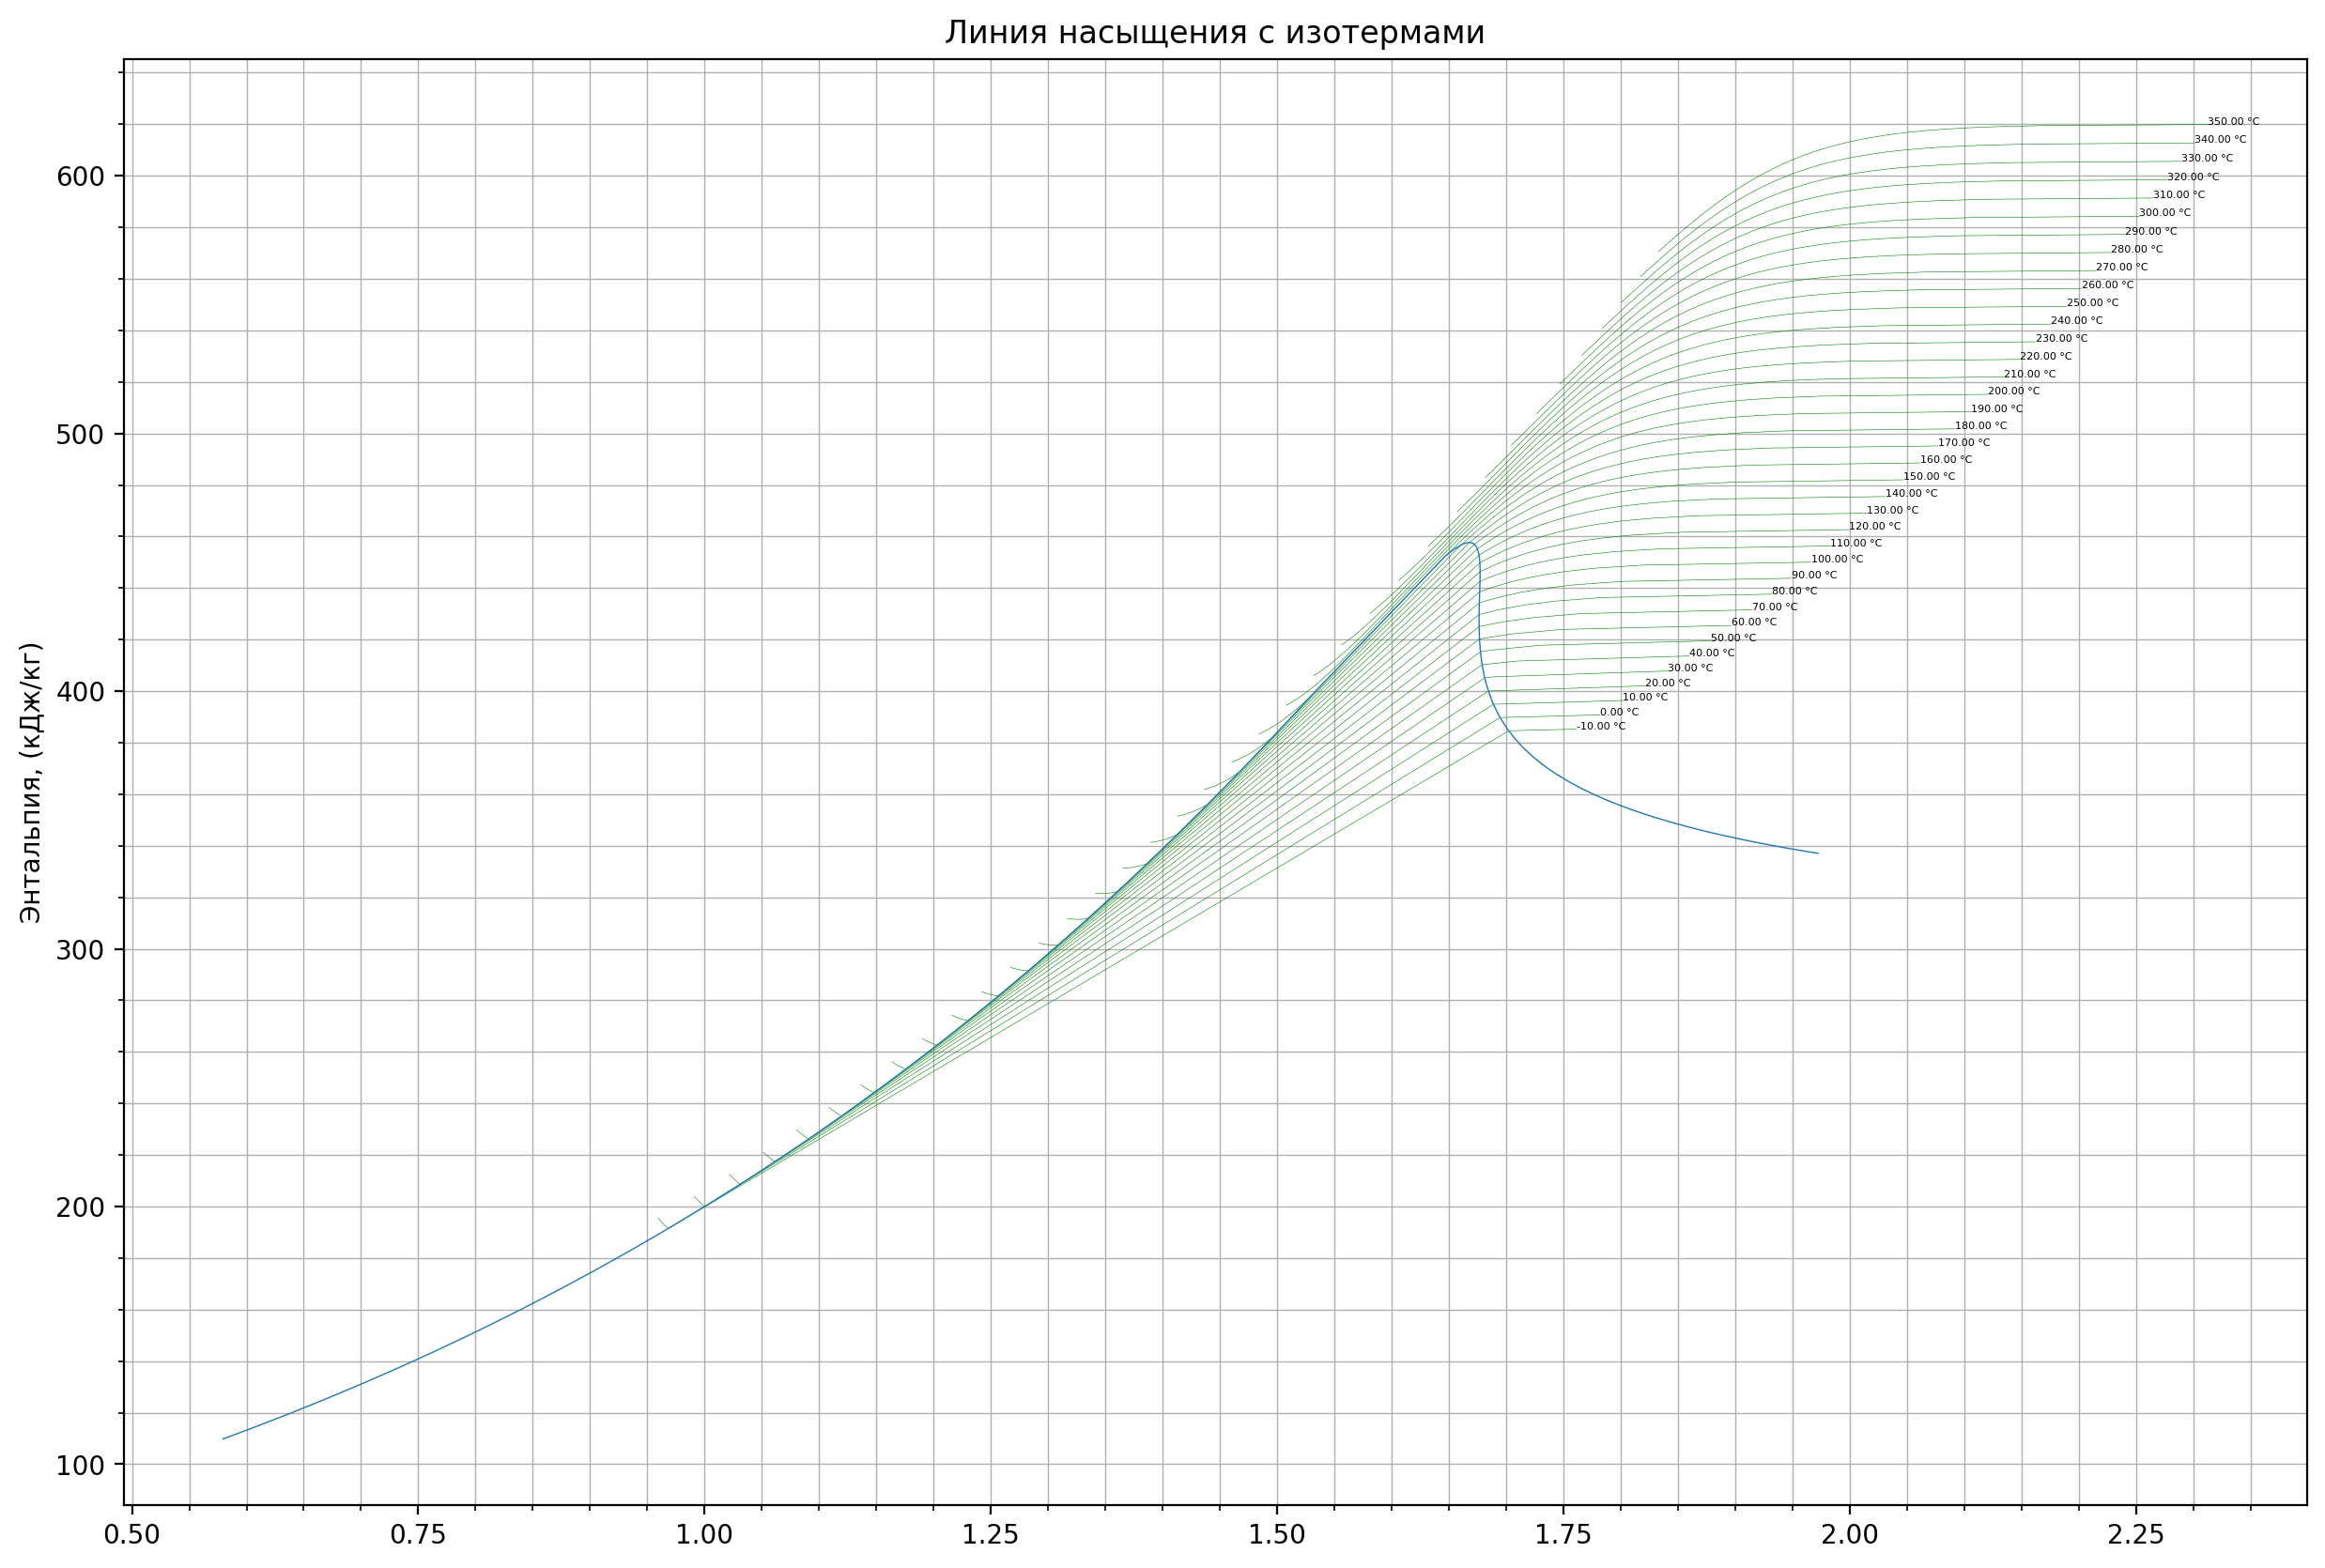

In [10]:
plt.subplots(figsize=(15, 10), dpi=200)
for i in range(len(T_isothermal)):
    plt.plot(S_isothermal[i], H_isothermal[i], color='g', linewidth=0.2)
    plt.text(
        S_isothermal[i][0], 
        H_isothermal[i][0], 
        f"{T_isothermal[i][0]:.2f} °C", 
        fontsize=4, 
        color='black', 
        bbox=dict(facecolor='none', alpha=0.3, edgecolor='none')
    )
plt.plot(S_saturation, H_saturation, linewidth=0.5)
plt.ylabel("Энтальпия, (кДж/кг)")
plt.title(f"Линия насыщения с изотермами")
plt.grid(True, which='both', linewidth=0.5)
plt.minorticks_on() 
plt.show()

# Изобары

In [11]:
# Данные указываются в барах
P_isobaric_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35,40, 45]
P_ON_GRAPH = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45] # Изобары, которые будут подписываться на графике

print("Давления для построения изобар:\n")
print(P_isobaric_array)

TLow_isobaric = -100 # Нижние и верхние границы температур для изобар
THigh_isobaric = 350
TInc_isobaric = 1 # Шаг температуры для изобра

Давления для построения изобар:

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40, 45]


In [12]:
P_isobaric, H_isobaric, S_isobaric = worker.isobaric(P_isobaric_array, TLow_isobaric, THigh_isobaric, TInc_isobaric)

Получение данных о изобаре 1 бар...
Данные получены успешно
Получение данных о изобаре 2 бар...
Данные получены успешно
Получение данных о изобаре 3 бар...
Данные получены успешно
Получение данных о изобаре 4 бар...
Данные получены успешно
Получение данных о изобаре 5 бар...
Данные получены успешно
Получение данных о изобаре 6 бар...
Данные получены успешно
Получение данных о изобаре 7 бар...
Данные получены успешно
Получение данных о изобаре 8 бар...
Данные получены успешно
Получение данных о изобаре 9 бар...
Данные получены успешно
Получение данных о изобаре 10 бар...
Данные получены успешно
Получение данных о изобаре 11 бар...
Данные получены успешно
Получение данных о изобаре 12 бар...
Данные получены успешно
Получение данных о изобаре 13 бар...
Данные получены успешно
Получение данных о изобаре 14 бар...
Данные получены успешно
Получение данных о изобаре 15 бар...
Данные получены успешно
Получение данных о изобаре 16 бар...
Данные получены успешно
Получение данных о изобаре 17 бар

# H-S диаграмма

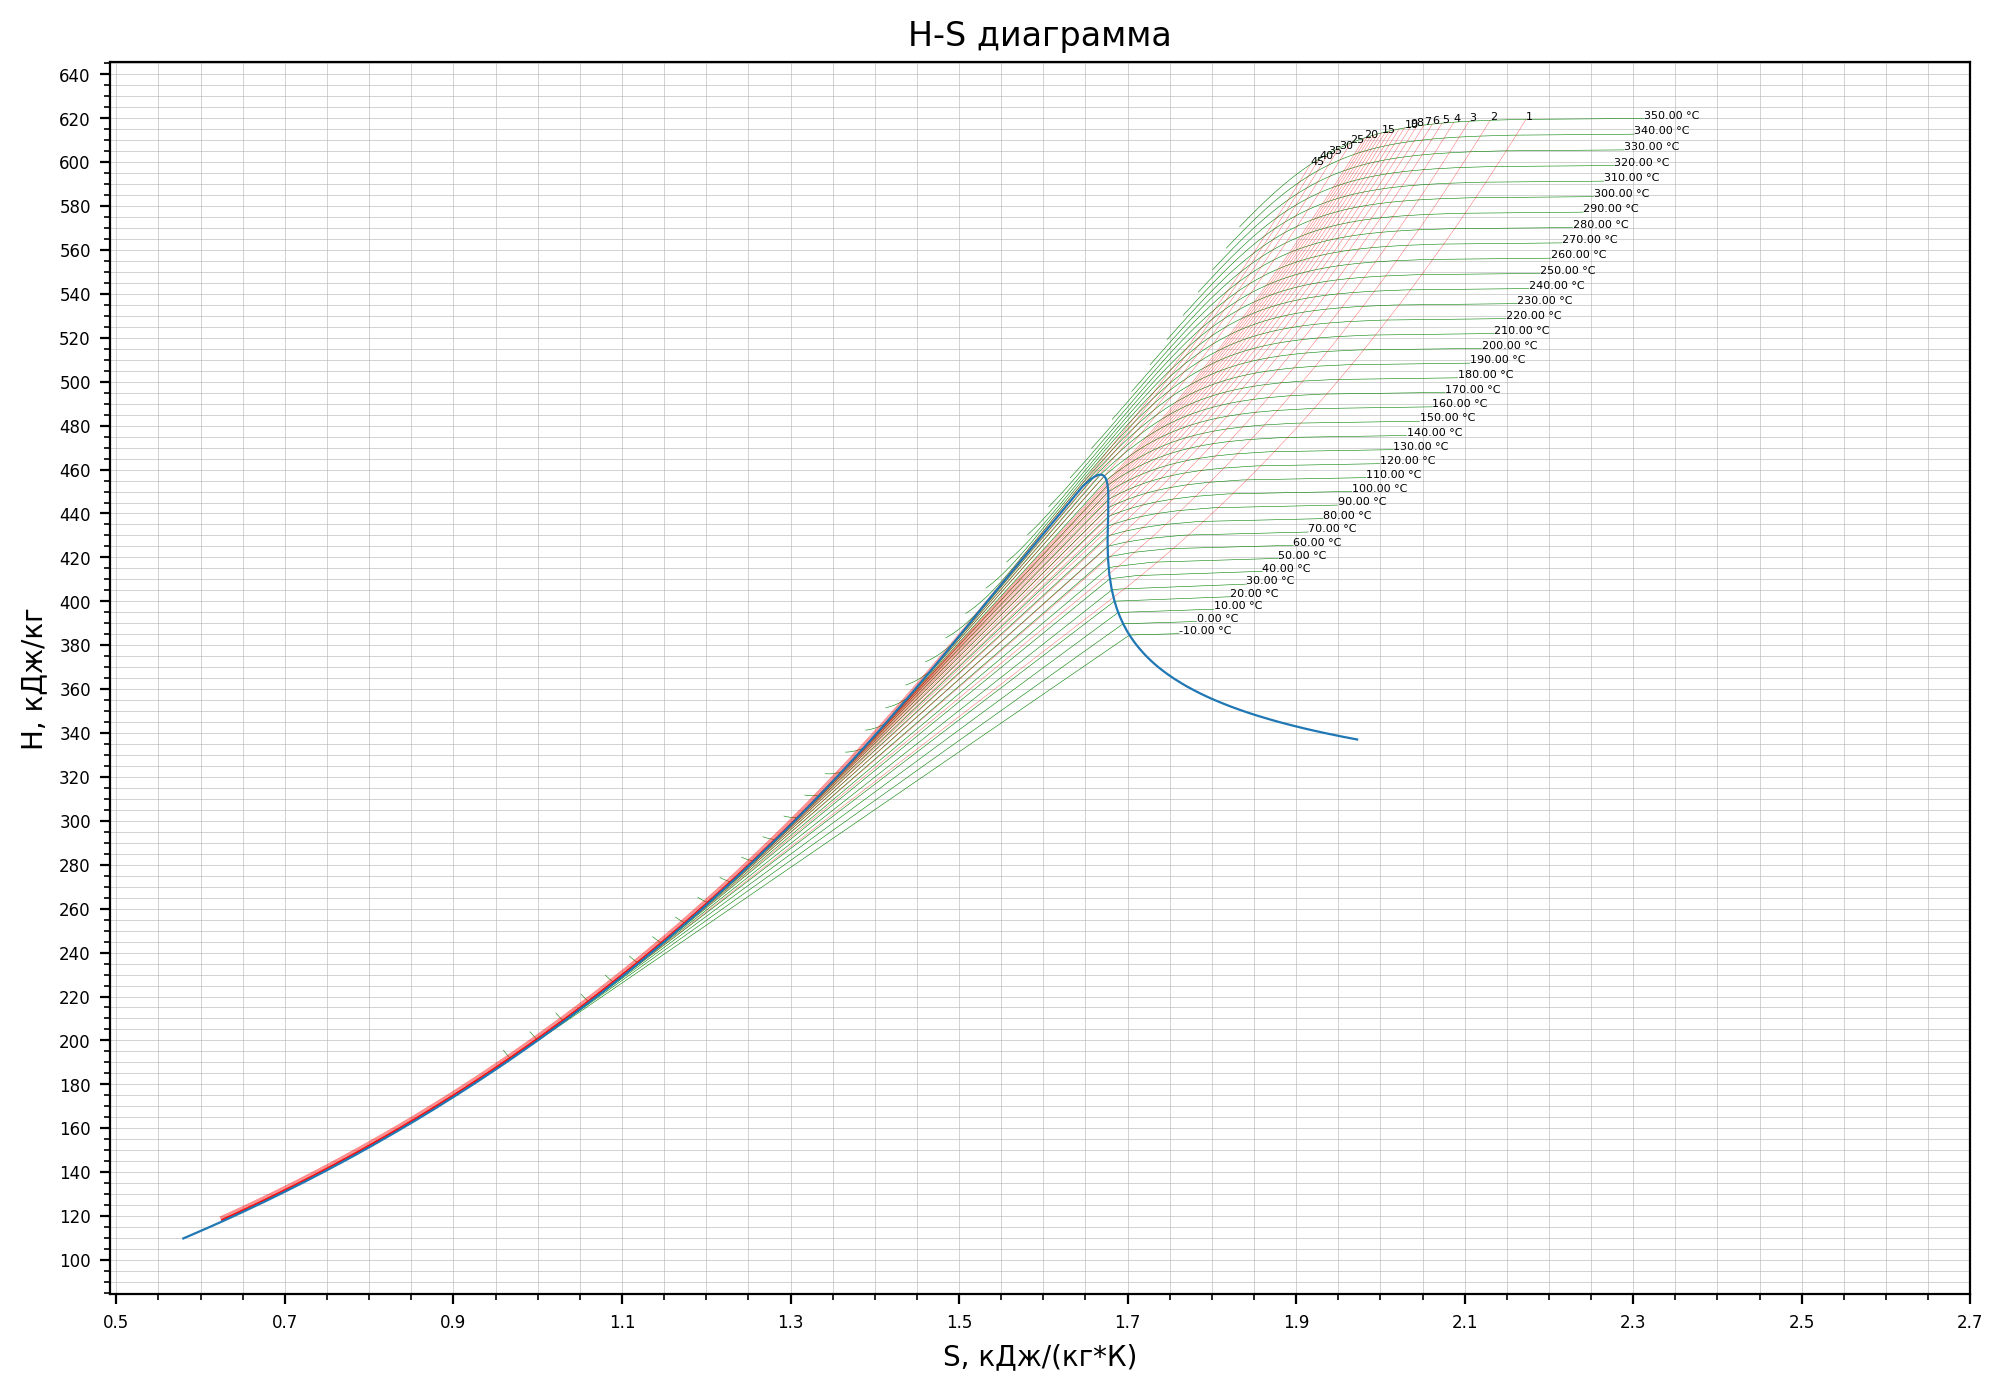

In [13]:
plt.subplots(figsize=(12, 8), dpi=200)

# Изотермы
for i in range(len(T_isothermal)):
    plt.plot(S_isothermal[i], H_isothermal[i], color='g', linewidth=0.2)
    plt.text(
        S_isothermal[i][0], 
        H_isothermal[i][0], 
        f"{T_isothermal[i][0]:.2f} °C", 
        fontsize=4, 
        color='black', 
        bbox=dict(facecolor='none', alpha=0.3, edgecolor='none')
    )

# Изобары
for i in range(len(P_isobaric)):
    plt.plot(S_isobaric[i], H_isobaric[i], color='r', linewidth=0.1)
    if P_isobaric[i][0] in P_ON_GRAPH:
        plt.text(
            S_isobaric[i][-1], 
            H_isobaric[i][-1], 
            f"{int(P_isobaric[i][0])}", 
            fontsize=4, 
            color='black', 
            bbox=dict(facecolor='none', alpha=0.3, edgecolor='none')
        )

# Линия насыщения
plt.plot(S_saturation, H_saturation, linewidth=0.8)
plt.ylabel("H, кДж/кг")
plt.xlabel("S, кДж/(кг*К)")
plt.title(f"H-S диаграмма")

# Необходиммо установить границы для оси X и Y
x_ticks = np.arange(0.5, 2.8,  step=0.2)  
y_ticks = np.arange(100, 660, step=20) 

plt.xticks(x_ticks, fontsize=6)
plt.yticks(y_ticks, fontsize=6)
plt.grid(True, which='both', linewidth=0.2)  
plt.minorticks_on()  

plt.show()
